In [122]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt

In [200]:
df = pd.read_csv("Translated_Reviews.csv")
df.head()

,Rating,Review,Translated_Review
0,Positive,perfect shipping fast really good quality usual,الشحن المثالي السريع جيد الجودة المعتاد حقاً
1,Positive,unable apply discount code purchase process as...,مساعدة عملية شراء شفرة الخصم غير قادرة على تطب...
2,Positive,fantastic always problem order gym shark recti...,روعة دائماً مشكلة طلبية الجمنازيوم turriced fo...
3,Positive,quick delivery high quality website easy use p...,توصيل سريع عالي الجودة على الموقع الإلكتروني ا...
4,Positive,quality gym clothing easy purchase delivered q...,جودة شراء الملابس الرياضية السهلة تم تسليمها ب...


In [201]:
df = df.dropna()
df.isna().sum()

Rating               0
Review               0
Translated_Review    0
dtype: int64

Rating
Negative    10451
Neutral      1292
Positive    31311
Name: count, dtype: int64


C:\Users\Hussien\AppData\Local\Temp\ipykernel_4156\927187097.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


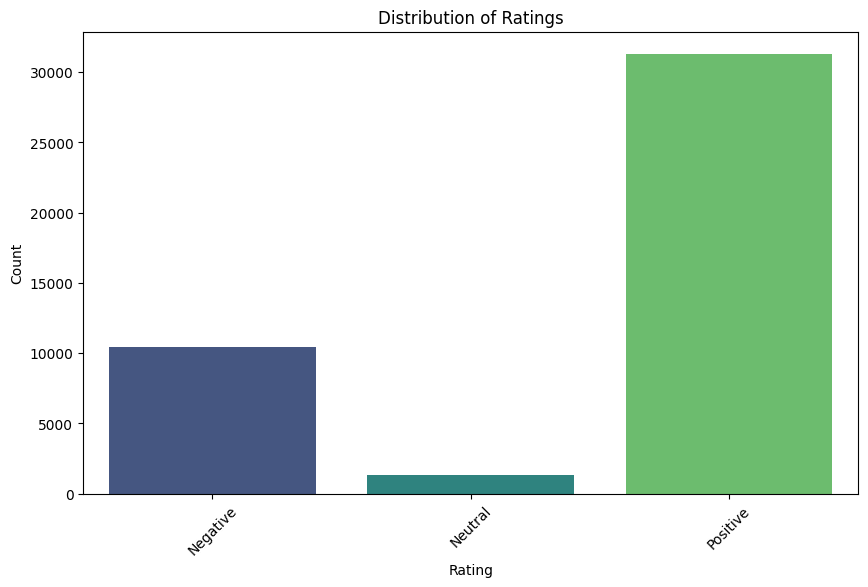

In [202]:
# Count the occurrences of each rating
rating_counts = df['Rating'].value_counts().sort_index()
print(rating_counts)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')

# Set plot labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(rotation=45)

# Display the plot
plt.show()

## Add another dataset to help balance the data

Rating
Negative    14200
Neutral      1925
Name: count, dtype: int64


C:\Users\Hussien\AppData\Local\Temp\ipykernel_4156\318350268.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


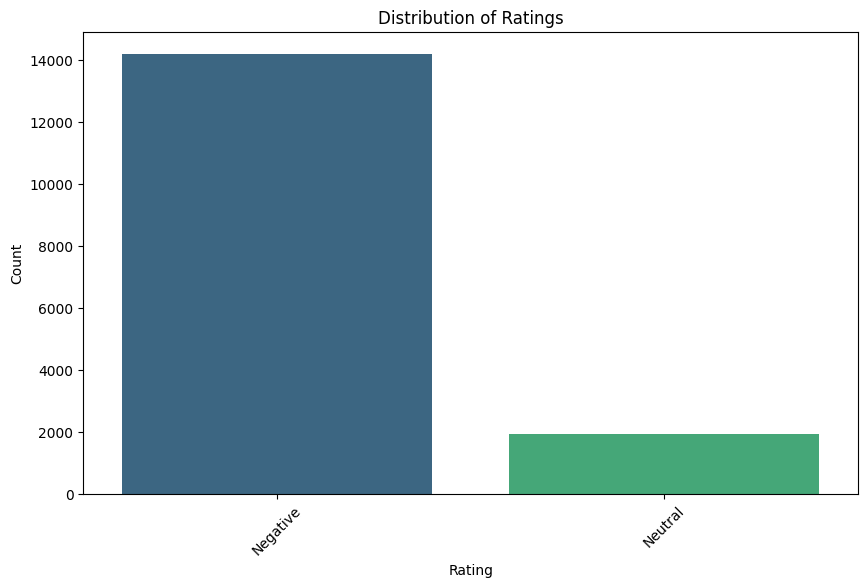

In [203]:
df1 = pd.read_csv("Translated_Reviews_Set1.csv")

df1 = df1.drop(['company', 'Unnamed: 0'], axis = 1)

df1 = df1.rename(columns={'review_description': 'Translated_Review', 'rating': 'Rating'})

df1 = df1.loc[:, ['Rating', 'Translated_Review']]

df1 = df1[df1['Rating'] != 1]

rating_mapping = {0 : 'Neutral', -1: 'Negative'}
df1['Rating'] = df1['Rating'].map(rating_mapping)

# Count the occurrences of each rating
rating_counts = df1['Rating'].value_counts().sort_index()
print(rating_counts)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')

# Set plot labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(rotation=45)

# Display the plot
plt.show()


Rating
Neutral    23753
Name: count, dtype: int64


C:\Users\Hussien\AppData\Local\Temp\ipykernel_4156\2734151309.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


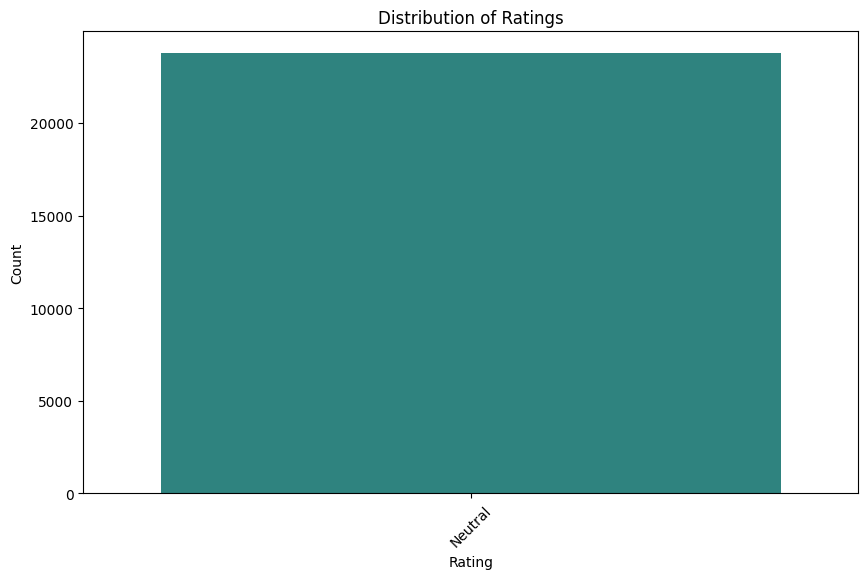

,Rating,Translated_Review
7,Neutral,اذا قمت بفتح التطبيق يطلب تحديث واذا ضغطت على ...
33,Neutral,مايدخلني التطبيق ليش؟؟؟ يقولي كلمة المرور او ا...
34,Neutral,ادخل اسم المستخدم وكلمه المرور ويلي اسم المستخ...
35,Neutral,التطبيق مو نفس اول صار مره يعلق ما يرسل الرمز ...
36,Neutral,بعد التحديث اصبحت رسالة التعميد لا تصل لجوالي ...
...,...,...
67122,Neutral,كتاب جيد وإن كان مملا بعض الشيء عند منتصف الكت...
67123,Neutral,أول تجربة مع الخيال العلمي...الكثير من المعلوم...
67124,Neutral,مرضي. الافطار لذيذ. لا يوجد قائمة طعام في الغر...
67125,Neutral,الرسائل بين وائل و شوق كانت أجمل مافي الرواية....


In [204]:
df2 = pd.read_excel("Translated_Reviews_Set2.xlsx")

df2 = df2.drop(['company', 'Unnamed: 0'], axis = 1)

df2 = df2.rename(columns={'review_description': 'Translated_Review', 'rating': 'Rating'})

df2 = df2.loc[:, ['Rating', 'Translated_Review']]

df2 = df2[df2['Rating'] == 0]

rating_mapping = {0 : 'Neutral'}
df2['Rating'] = df2['Rating'].map(rating_mapping)

# Count the occurrences of each rating
rating_counts = df2['Rating'].value_counts().sort_index()
print(rating_counts)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')

# Set plot labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(rotation=45)

# Display the plot
plt.show()

df2

In [205]:
# Concatenate along rows
result = pd.concat([df, df1, df2], axis=0, ignore_index=True)
df = result
df

,Rating,Review,Translated_Review
0,Positive,perfect shipping fast really good quality usual,الشحن المثالي السريع جيد الجودة المعتاد حقاً
1,Positive,unable apply discount code purchase process as...,مساعدة عملية شراء شفرة الخصم غير قادرة على تطب...
2,Positive,fantastic always problem order gym shark recti...,روعة دائماً مشكلة طلبية الجمنازيوم turriced fo...
3,Positive,quick delivery high quality website easy use p...,توصيل سريع عالي الجودة على الموقع الإلكتروني ا...
4,Positive,quality gym clothing easy purchase delivered q...,جودة شراء الملابس الرياضية السهلة تم تسليمها ب...
...,...,...,...
82927,Neutral,NaN,كتاب جيد وإن كان مملا بعض الشيء عند منتصف الكت...
82928,Neutral,NaN,أول تجربة مع الخيال العلمي...الكثير من المعلوم...
82929,Neutral,NaN,مرضي. الافطار لذيذ. لا يوجد قائمة طعام في الغر...
82930,Neutral,NaN,الرسائل بين وائل و شوق كانت أجمل مافي الرواية....


In [206]:
df = df.drop(['Review'], axis = 1)
df = df.dropna()
df.isna().sum()

Rating               0
Translated_Review    0
dtype: int64

In [208]:
df.shape

(82929, 2)

In [209]:
df = df.drop_duplicates()
df.shape

(79569, 2)

Rating
Negative    24361
Neutral     25707
Positive    29501
Name: count, dtype: int64


C:\Users\Hussien\AppData\Local\Temp\ipykernel_4156\927187097.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


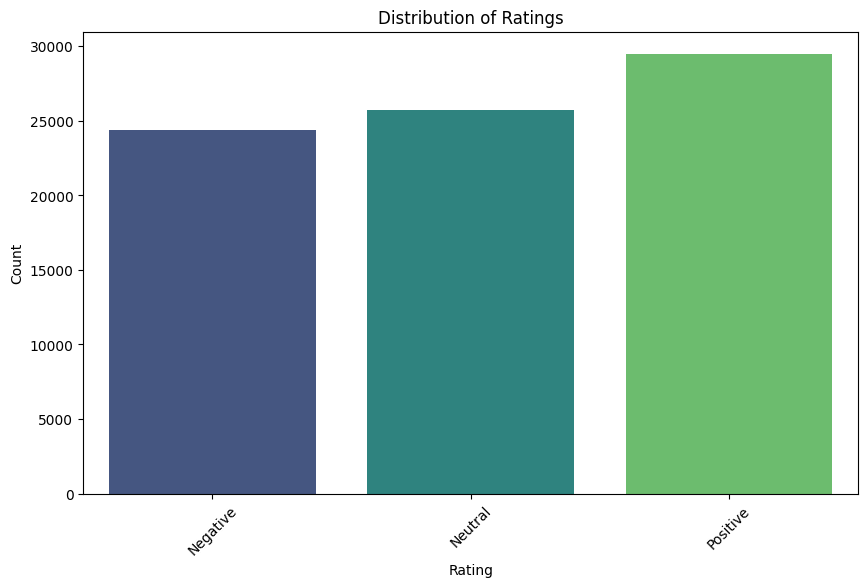

In [210]:
# Count the occurrences of each rating
rating_counts = df['Rating'].value_counts().sort_index()
print(rating_counts)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')

# Set plot labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [211]:
print(df.shape)
df.isna().sum()

(79569, 2)


Rating               0
Translated_Review    0
dtype: int64

In [212]:
def keep_only_arabic(text):
    # Remove everything that is not Arabic
    cleaned_text = re.sub(r'[^\u0600-\u06FF\s]', '', text)
    # Return None if the cleaned text is empty or only whitespace
    return cleaned_text if cleaned_text.strip() else None


# Assuming `df` is your DataFrame and "Translated_Review" is the column name
df["Translated_Review"] = df["Translated_Review"].apply(keep_only_arabic)

df

,Rating,Translated_Review
0,Positive,الشحن المثالي السريع جيد الجودة المعتاد حقاً
1,Positive,مساعدة عملية شراء شفرة الخصم غير قادرة على تطب...
2,Positive,روعة دائماً مشكلة طلبية الجمنازيوم
3,Positive,توصيل سريع عالي الجودة على الموقع الإلكتروني ا...
4,Positive,جودة شراء الملابس الرياضية السهلة تم تسليمها ب...
...,...,...
82927,Neutral,كتاب جيد وإن كان مملا بعض الشيء عند منتصف الكتاب
82928,Neutral,أول تجربة مع الخيال العلميالكثير من المعلومات ...
82929,Neutral,مرضي الافطار لذيذ لا يوجد قائمة طعام في الغرفة...
82930,Neutral,الرسائل بين وائل و شوق كانت أجمل مافي الرواية ...


In [213]:
def remove_punctuation(text):
    pattern = r'[،؛؟!"\'()\[\]{}<>«»\*\&\%\$\#\@\^\~\-\+\=\:\\\/\.\,\?\ء]'
    clean_text = re.sub(pattern, '', str(text))  
    return clean_text

df['Translated_Review'] = df['Translated_Review'].apply(remove_punctuation)

print(df['Translated_Review'])

0             الشحن المثالي السريع جيد الجودة المعتاد حقاً
1        مساعدة عملية شرا شفرة الخصم غير قادرة على تطبي...
2                    روعة دائماً مشكلة طلبية الجمنازيوم   
3        توصيل سريع عالي الجودة على الموقع الإلكتروني ا...
4        جودة شرا الملابس الرياضية السهلة تم تسليمها بسرعة
                               ...                        
82927     كتاب جيد وإن كان مملا بعض الشي عند منتصف الكتاب 
82928    أول تجربة مع الخيال العلميالكثير من المعلومات ...
82929    مرضي الافطار لذيذ لا يوجد قائمة طعام في الغرفة...
82930    الرسائل بين وائل و شوق كانت أجمل مافي الرواية ...
82931    استقبال سي جدا وعدم الاستعداد للنزلا  لا شي عد...
Name: Translated_Review, Length: 79569, dtype: object


In [214]:
from pyarabic.araby import strip_tashkeel, normalize_hamza
df['Translated_Review'] = df['Translated_Review'].apply(lambda x: strip_tashkeel(x))
df['Translated_Review'] = df['Translated_Review'].apply(lambda x: normalize_hamza(x))
print(df['Translated_Review'])


0              الشحن المثالي السريع جيد الجودة المعتاد حقا
1        مساعدة عملية شرا شفرة الخصم غير قادرة على تطبي...
2                     روعة داءما مشكلة طلبية الجمنازيوم   
3        توصيل سريع عالي الجودة على الموقع الءلكتروني ا...
4        جودة شرا الملابس الرياضية السهلة تم تسليمها بسرعة
                               ...                        
82927     كتاب جيد وءن كان مملا بعض الشي عند منتصف الكتاب 
82928    ءول تجربة مع الخيال العلميالكثير من المعلومات ...
82929    مرضي الافطار لذيذ لا يوجد قاءمة طعام في الغرفة...
82930    الرساءل بين واءل و شوق كانت ءجمل مافي الرواية ...
82931    استقبال سي جدا وعدم الاستعداد للنزلا  لا شي عد...
Name: Translated_Review, Length: 79569, dtype: object


In [215]:
print(df.shape)
df.isna().sum()

(79569, 2)


Rating               0
Translated_Review    0
dtype: int64

In [216]:
rating_mapping = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
df['Rating'] = df['Rating'].map(rating_mapping)

In [217]:
df.head()

,Rating,Translated_Review
0,2,الشحن المثالي السريع جيد الجودة المعتاد حقا
1,2,مساعدة عملية شرا شفرة الخصم غير قادرة على تطبي...
2,2,روعة داءما مشكلة طلبية الجمنازيوم
3,2,توصيل سريع عالي الجودة على الموقع الءلكتروني ا...
4,2,جودة شرا الملابس الرياضية السهلة تم تسليمها بسرعة


In [218]:
df['Translated_Review']

0              الشحن المثالي السريع جيد الجودة المعتاد حقا
1        مساعدة عملية شرا شفرة الخصم غير قادرة على تطبي...
2                     روعة داءما مشكلة طلبية الجمنازيوم   
3        توصيل سريع عالي الجودة على الموقع الءلكتروني ا...
4        جودة شرا الملابس الرياضية السهلة تم تسليمها بسرعة
                               ...                        
82927     كتاب جيد وءن كان مملا بعض الشي عند منتصف الكتاب 
82928    ءول تجربة مع الخيال العلميالكثير من المعلومات ...
82929    مرضي الافطار لذيذ لا يوجد قاءمة طعام في الغرفة...
82930    الرساءل بين واءل و شوق كانت ءجمل مافي الرواية ...
82931    استقبال سي جدا وعدم الاستعداد للنزلا  لا شي عد...
Name: Translated_Review, Length: 79569, dtype: object

In [219]:
df.to_csv('Concat_Translated_Review.csv', index=False)